In [2]:
import geopandas as gpd
import psycopg2  # (if it is postgres/postgis)
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

con = psycopg2.connect(database="postgis-database", user="postgis", password="postgis", host="localhost", port=35432)



In [6]:
sql="""
    SELECT         
        tau, geom
    FROM
        AOD_AC3
    WHERE id > 3500
    and id < 3560
"""

data = gpd.read_postgis(sql=sql, con=con)
con.commit()


In [7]:
data.head()

,tau,geom


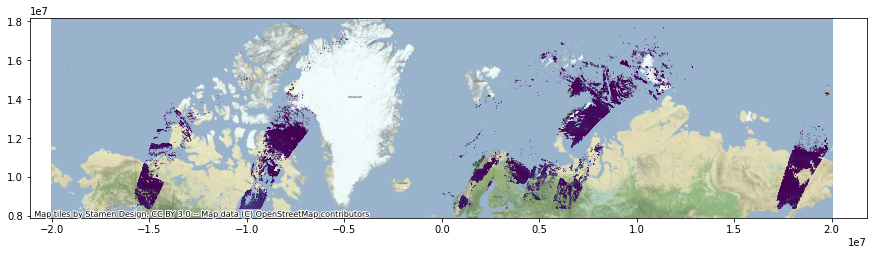

In [19]:
data = data.to_crs(epsg=3857)
ax = data.plot(figsize=(15, 15), alpha=0.9, column='tau')
ctx.add_basemap(ax)
